# Feature Engineering on Advance House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) #to visualize all columns
dataset = pd.read_csv('house_price.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Train Test Split
While dealing with the real world problem statement, it is necessary to split the data into a train and test set then applying feature engineering, because it prevent overfitting and leakage of the data.

In [3]:
x = dataset.iloc[:, :-1]
y = dataset[['SalePrice']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

## Train-dataset Feature engineering

## Missing values

### Missing values in Categorical features

In [4]:
#checking the percentage of the 'NaN' values in categorical features.
catfeature_with_nan = [feature for feature in x_train.columns if x_train[feature].isnull().sum() > 1
                 and x_train[feature].dtypes == 'O']

print('Percentage of nan in each categorical features :- ')
for feature in catfeature_with_nan :
    nan_percent = round(x_train[feature].isnull().mean() * 100, 4)
    print(f'{feature} :- {nan_percent}%')

Percentage of nan in each categorical features :- 
Alley :- 93.8356%
MasVnrType :- 0.4566%
BsmtQual :- 2.4353%
BsmtCond :- 2.4353%
BsmtExposure :- 2.5114%
BsmtFinType1 :- 2.4353%
BsmtFinType2 :- 2.5114%
FireplaceQu :- 47.2603%
GarageType :- 5.6317%
GarageFinish :- 5.6317%
GarageQual :- 5.6317%
GarageCond :- 5.6317%
PoolQC :- 99.5434%
Fence :- 81.4307%
MiscFeature :- 96.1187%


###### Since we are dealing with the missing categorical values, so we will replace the "NaN" value with another category let say is as 'missing'.
###### Later on we will make the 'missing' category into some integer value by applying OneHotEncoading.
###### Whenever there is any missing values in categorical feature, always create a new category and fill it in the place of NaN.

In [5]:
#creating a function to replace NaN with Missing
def replace_nan_in_catfeature(dataset, nan_feature) :
    
    data = dataset.copy()
    data[nan_feature] = data[nan_feature].fillna('Missing')
    return data

x_train = replace_nan_in_catfeature(x_train, catfeature_with_nan)
x_train[catfeature_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

Here we can see there are zero NaN values in categorical features, because they all are replaced by the string "Missing".

In [6]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,931,20,RL,73.0,8925,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,1466,0,0,1466,0,0,2,0,3,1,Gd,7,Typ,0,Missing,Attchd,2007.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,Missing,Missing,Missing,0,7,2009,WD,Normal
656,657,20,RL,72.0,10007,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,1053,0,0,1053,1,0,1,1,3,1,Gd,5,Typ,0,Missing,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,Missing,MnPrv,Missing,0,8,2008,WD,Normal
45,46,120,RL,61.0,7658,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,Missing,Missing,Missing,0,2,2010,WD,Normal
1348,1349,20,RL,NaN,16196,Pave,Missing,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1998.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal
55,56,20,RL,100.0,10175,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,1425,0,0,1425,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1964.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,Missing,Missing,Missing,0,7,2008,WD,Normal


### Missing Values in numeric features

In [7]:
#checking the percentage of NaN values in numeric features.
numericfeature_with_nan = [feature for feature in x_train.columns if x_train[feature].isnull().sum() > 1
                          and x_train[feature].dtypes != 'O']

print('Percentage of missing values in numeric features :- ')

for feature in numericfeature_with_nan :
    percent = np.around(x_train[feature].isnull().mean() * 100, 4)
    print(f"{feature} :- {percent}%")

Percentage of missing values in numeric features :- 
LotFrontage :- 17.7321%
MasVnrArea :- 0.4566%
GarageYrBlt :- 5.6317%


###### If the features contain outliers always use median or mode to replace NaN values

In [8]:
#replacing the NaN values from numeric feature.
for feature in numericfeature_with_nan :
    
    #since there are many outliers we use median to replace nan values.
    median_value = x_train[feature].median()
    #creating a new feature.
    x_train[feature + " nan"] = np.where(x_train[feature].isnull(), 1, 0)
    x_train[feature].fillna(median_value, inplace=True)
    
x_train[numericfeature_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Temporal Variable (Date Time vairables)
We will calculate the age of the house, age of modification and age of houese garage.

Basically we are finding how old the house is till the house was sold.

We will replace the year (1998, 2003,....) by the age of the house(5, 3, 8,...)

In [9]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt'] :
    
    x_train[feature] = x_train['YrSold'] - x_train[feature]

In [10]:
#before converting the year into age
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0


In [11]:
#after converting the year into age.
x_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


## Skeweness in numerical feature (continuos numerical features)
We saw in EDA the continuos features were not distributed normaly. Since we are working with regression problem it is good to transform the distribution to gaussian or normal distribution.

In [12]:
#converting the skewed distribution into normal distribution.
skewed_numeric_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in skewed_numeric_features :
    x_train[feature] = np.log(x_train[feature])
    
x_train[skewed_numeric_features].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
930,4.290459,9.096612,7.290293,7.290293
656,4.276666,9.211040,6.959399,6.959399
45,4.110874,8.943506,7.468513,7.468513
1348,4.234107,9.692520,7.309212,7.309212
55,4.605170,9.227689,7.261927,7.261927


In [13]:
#also we need to convert the distribution of y_train(SalePrice).
y_train['SalePrice'] = np.log(y_train['SalePrice'])
y_train.head()

,SalePrice
930,12.211060
656,11.887931
45,12.675764
1348,12.278393
55,12.103486


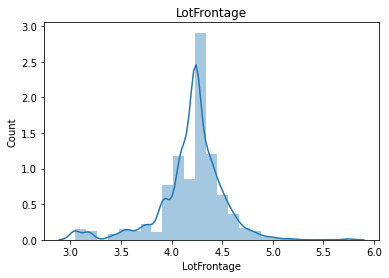

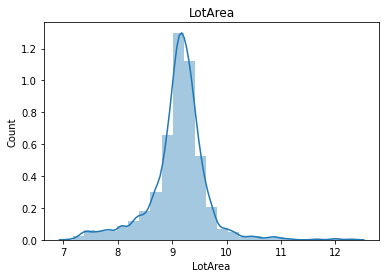

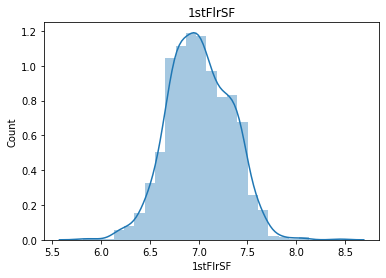

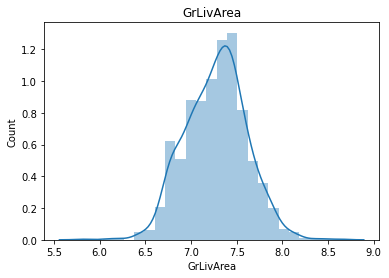

In [14]:
for feature in skewed_numeric_features :
    
    sns.distplot(x_train[feature], bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Handling Rare Categorical Feature
Rare categorical features the features that are present less than 1% of the observations.

We have to remove those values which are present less than 1% of the observations in categorical features, because they does not play any important role.

In [15]:
#creating a list of categorical features and ovserving it.
categorical_features = [feature for feature in x_train.columns if x_train[feature].dtypes == 'O']
x_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
930,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
656,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
45,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1348,RL,Pave,Missing,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
55,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [16]:
#replacing the rare values with string 'rar_var'
data = pd.concat([x_train, y_train], axis=1)

for feature in categorical_features :
    
    temp = data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df = temp[temp > 0.01].index
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], 'rare_var')
    
data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,SalePrice
930,931,20,RL,4.290459,9.096612,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2,2,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1450,1466,GasA,Ex,Y,SBrkr,7.290293,0,0,7.290293,0,0,2,0,3,1,Gd,7,Typ,0,Missing,Attchd,2.0,Fin,3,610,TA,TA,Y,100,18,0,0,0,0,Missing,Missing,Missing,0,7,2009,WD,Normal,0,0,0,12.211060
656,657,20,RL,4.276666,9.211040,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,49,2,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,6.959399,0,0,6.959399,1,0,1,1,3,1,Gd,5,Typ,0,Missing,Attchd,49.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,Missing,MnPrv,Missing,0,8,2008,WD,Normal,0,0,0,11.887931
45,46,120,RL,4.110874,8.943506,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,5,5,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,7.468513,0,0,7.468513,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,5.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,Missing,Missing,Missing,0,2,2010,WD,Normal,0,0,0,12.675764
1348,1349,20,RL,4.234107,9.692520,Pave,Missing,rare_var,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,9,9,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,Ex,Y,SBrkr,7.309212,0,0,7.309212,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,9.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,1,0,0,12.278393
55,56,20,RL,4.605170,9.227689,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,44,44,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490,Unf,0,935,1425,GasA,Gd,Y,SBrkr,7.261927,0,0,7.261927,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,44.0,RFn,2,576,TA,TA,Y,0,0,0,407,0,0,Missing,Missing,Missing,0,7,2008,WD,Normal,0,0,0,12.103486
1228,1229,120,RL,4.174387,9.078978,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,0,0,Hip,CompShg,MetalSd,MetalSd,BrkFace,766.0,Ex,TA,PConc,Ex,TA,No,GLQ,1540,Unf,0,162,1702,GasA,Ex,Y,SBrkr,7.439559,0,0,7.439559,1,0,1,1,1,1,Ex,7,Typ,1,Gd,Attchd,0.0,Fin,3,1052,TA,TA,Y,0,72,0,0,224,0,Missing,Missing,Missing,0,10,2008,New,Partial,0,0,0,12.813918


In [17]:
data.shape

(1314, 84)

## Replacing the categorical variables with Target Guided Ordinal Encoding (Mean Rank Encoding)

In [18]:
#categorical features
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
930,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
656,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
45,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1348,RL,Pave,Missing,rare_var,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
55,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [19]:
#replacing the categories
for feature in categorical_features :
    
    encoded_ordered_categories = data.groupby(feature)['SalePrice'].mean().sort_values().index
    encoded_ordered_categories = {k:i for i, k in enumerate(encoded_ordered_categories, start=0)}
    data[feature] = data[feature].map(encoded_ordered_categories)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,SalePrice
930,931,20,3,4.290459,9.096612,1,2,1,3,1,0,0,19,2,1,3,3,8,5,2,2,0,0,10,10,0,0.0,2,3,4,3,3,3,6,16,4,0,1450,1466,2,4,1,3,7.290293,0,0,7.290293,0,0,2,0,3,1,2,7,4,0,1,4,2.0,3,3,610,2,3,2,100,18,0,0,0,0,0,3,2,0,7,2009,2,3,0,0,0,12.211060
656,657,20,3,4.276666,9.211040,1,2,1,1,1,0,0,8,2,1,3,3,5,7,49,2,0,0,6,6,2,54.0,2,3,2,2,3,1,4,806,4,0,247,1053,2,4,1,3,6.959399,0,0,6.959399,1,0,1,1,3,1,2,5,4,0,1,4,49.0,2,1,312,2,3,2,0,0,0,0,0,0,0,2,2,0,8,2008,2,3,0,0,0,11.887931
45,46,120,3,4.110874,8.943506,1,2,0,1,1,0,0,21,2,1,4,3,9,5,5,5,2,0,3,2,2,412.0,3,3,4,4,3,1,6,456,4,0,1296,1752,2,4,1,3,7.468513,0,0,7.468513,1,0,2,0,2,1,3,6,4,1,4,4,5.0,2,2,576,2,3,2,196,82,0,0,0,0,0,3,2,0,2,2010,2,3,0,0,0,12.675764
1348,1349,20,3,4.234107,9.692520,1,2,2,2,1,0,0,10,2,1,3,3,7,5,9,9,0,0,10,10,0,0.0,2,3,4,3,3,4,6,1443,4,0,39,1482,2,4,1,3,7.309212,0,0,7.309212,1,0,2,0,3,1,2,5,4,1,2,4,9.0,2,2,514,2,3,2,402,25,0,0,0,0,0,3,2,0,8,2007,2,3,1,0,0,12.278393
55,56,20,3,4.605170,9.227689,1,2,1,1,1,0,0,8,2,1,3,3,6,5,44,44,0,0,6,7,2,272.0,1,3,2,2,3,1,2,490,4,0,935,1425,2,3,1,3,7.261927,0,0,7.261927,0,0,2,0,3,1,1,7,4,1,4,4,44.0,2,2,576,2,3,2,0,0,0,407,0,0,0,3,2,0,7,2008,2,3,0,0,0,12.103486
1228,1229,120,3,4.174387,9.078978,1,2,0,1,1,2,0,21,2,1,4,3,9,5,0,0,2,0,3,2,2,766.0,3,3,4,4,3,1,6,1540,4,0,162,1702,2,4,1,3,7.439559,0,0,7.439559,1,0,1,1,1,1,3,7,4,1,4,4,0.0,3,3,1052,2,3,2,0,72,0,0,224,0,0,3,2,0,10,2008,3,4,0,0,0,12.813918
963,964,20,3,4.804021,9.386225,1,2,1,1,1,2,0,15,2,1,3,3,9,5,2,2,0,0,10,10,0,0.0,2,3,4,4,3,1,5,0,4,0,1800,1800,2,4,1,3,7.495542,0,0,7.495542,0,0,2,0,2,1,3,7,4,0,1,4,2.0,3,2,702,2,3,2,288,136,0,0,0,0,0,3,2,0,5,2009,2,3,0,0,0,12.384219
921,922,90,3,4.204693,9.079890,1,2,0,1,1,0,0,3,1,1,1,1,5,7,108,5,0,0,3,2,0,0.0,1,3,2,2,3,1,4,1084,4,0,188,1272,2,3,1,3,7.148346,928,0,7.696213,2,0,2,2,4,2,1,9,4,0,1,0,28.0,0,0,0,0,0,0,0,70,0,0,0,0,0,4,2,0,9,2008,2,3,0,0,1,11.890677
458,459,70,1,4.234107,8.536996,1,0,0,1,1,0,0,5,2,1,3,5,8,7,83,12,2,0,4,3,0,0.0,1,2,4,2,3,1,5,0,4,0,588,588,2,1,1,3,6.725034,833,0,7.418181,0,0,1,0,3,1,2,7,4,1,4,2,83.0,1,1,228,2,3,2,192,63,0,0,0,0,0,2,2,0,6,2008,2,3,1,0,0,11.989160
1386,1387,60,3,4.382027,9.722685,1,2,1,1,1,0,0,12,3,1,3,5,7,5,28,28,0,0,7,7,2,184.0,1,3,2,3,3,1,2,790,2,469,133,1392,2,2,1,3,7.238497,1392,0,7.931644,1,0,3,1,5,1,2,12,4,2,3,4,28.0,2,2,564,2,3,2,0,112,0,0,440,519,1,2,0,2000,7,2006,2,3,0,0,0,12.429216


#### From this data create a new x_train and y_train set

In [20]:
#creating xtrain and ytrain
x_train = data.iloc[:, 1:-1]
y_train = data[['SalePrice']]

In [21]:
#storing all the columns
columns_name = x_train.columns

## Scaling the the dataset

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [23]:
x_train

array([[0.        , 0.75      , 0.46117107, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.45606561, ..., 0.        , 0.        ,
        0.        ],
       [0.58823529, 0.75      , 0.39469927, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41176471, 0.25      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.58823529, 0.75      , 0.4403126 , ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.3760328 , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
#creating a dataframe
df = pd.DataFrame(x_train, columns=columns_name)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.440313,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


## Saving the dataset as csv file that we have created, sothat we can use it during feature selection.

In [25]:
new_df = pd.concat([y_train.reset_index(drop=True), 
                    df.reset_index(drop=True)], 
                   axis=1)
new_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,12.278393,0.000000,0.75,0.440313,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
#saving the dataset in my pc
new_df.to_csv('train.csv', index=False)

## Test dataset - Feature Engineering

In [26]:
x_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
491,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
459,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
279,280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392,Unf,0,768,1160,GasA,Ex,Y,SBrkr,1156,866,0,2022,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1977.0,Fin,2,505,TA,TA,Y,288,117,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Family


In [27]:
#drop ID
x_test.drop('Id', axis=1, inplace=True)
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
491,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
459,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
279,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392,Unf,0,768,1160,GasA,Ex,Y,SBrkr,1156,866,0,2022,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1977.0,Fin,2,505,TA,TA,Y,288,117,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
655,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Family


In [28]:
#missing values in categorical features
cate_with_nan = [feature for feature in x_test.columns if x_test[feature].dtypes == 'O' 
                 and x_test[feature].isnull().sum() > 1]

print('Percent of nan in categorical features :- ')

for feature in cate_with_nan :
    nan_percent = np.round(x_test[feature].isnull().mean() * 100, 4)
    print(f'{feature} :- {nan_percent}%')

Percent of nan in categorical features :- 
Alley :- 93.1507%
MasVnrType :- 1.3699%
BsmtQual :- 3.4247%
BsmtCond :- 3.4247%
BsmtExposure :- 3.4247%
BsmtFinType1 :- 3.4247%
BsmtFinType2 :- 3.4247%
FireplaceQu :- 47.2603%
GarageType :- 4.7945%
GarageFinish :- 4.7945%
GarageQual :- 4.7945%
GarageCond :- 4.7945%
PoolQC :- 99.3151%
Fence :- 74.6575%
MiscFeature :- 97.9452%


In [29]:
#replacing nan with 'Missing' in categorical features
x_test = replace_nan_in_catfeature(x_test, cate_with_nan)
x_test[cate_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
x_test[cate_with_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
529,Missing,Missing,TA,TA,No,Rec,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
491,Missing,None,TA,TA,No,BLQ,Rec,TA,Attchd,Unf,TA,TA,Missing,MnPrv,Missing
459,Missing,BrkCmn,TA,TA,No,LwQ,Unf,TA,Detchd,Unf,TA,TA,Missing,Missing,Missing
279,Missing,BrkFace,Gd,TA,No,BLQ,Unf,TA,Attchd,Fin,TA,TA,Missing,Missing,Missing
655,Missing,BrkFace,TA,TA,No,Unf,Unf,Missing,Detchd,Unf,TA,TA,Missing,Missing,Missing


In [31]:
#list of categorical features
categorical_feature = [feature for feature in x_test.columns if x_test[feature].dtypes == 'O']
print(f'Total categorical features :- {len(categorical_feature)}')

Total categorical features :- 43


In [32]:
x_test[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
529,RL,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Stone,Missing,Gd,TA,PConc,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Maj1,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Alloca
491,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,BLQ,Rec,GasA,TA,Y,FuseA,Fa,Typ,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
459,RL,Pave,Missing,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkCmn,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal
279,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
655,RM,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,Gable,CompShg,HdBoard,ImStucc,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Family


In [33]:
#missing values in numeric features
numericfeature_with_nan = [feature for feature in x_test.columns if x_test[feature].isnull().sum() > 1
                          and x_test[feature].dtypes != 'O']

print('Percentage of missing values in numeric features :- ')

for feature in numericfeature_with_nan :
    percent = np.around(x_test[feature].isnull().mean() * 100, 4)
    print(f"{feature} :- {percent}%")

Percentage of missing values in numeric features :- 
LotFrontage :- 17.8082%
MasVnrArea :- 1.3699%
GarageYrBlt :- 4.7945%


In [34]:
#replacing the NaN values from numeric feature.
for feature in numericfeature_with_nan :
    
    #since there are many outliers we use median to replace nan values.
    median_value = x_test[feature].median()
    #creating a new feature.
    x_test[feature + " nan"] = np.where(x_test[feature].isnull(), 1, 0)
    x_test[feature].fillna(median_value, inplace=True)
    
x_test[numericfeature_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [35]:
#temporal variables in numeric features
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt'] :
    
    x_test[feature] = x_test['YrSold'] - x_test[feature]
    
x_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
529,50,32,32.0
491,65,56,65.0
459,59,59,59.0
279,31,31,31.0
655,39,39,39.0


In [36]:
#converting the skewed distribution into normal distribution.
skewed_numeric_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in skewed_numeric_features :
    x_test[feature] = np.log(x_test[feature])
    
x_test[skewed_numeric_features].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
529,4.248495,10.394151,7.830028,7.830028
491,4.369448,9.157994,6.864848,7.363914
459,4.248495,8.855806,6.886532,7.092574
279,4.418841,9.210840,7.052721,7.611842
655,3.044522,7.426549,6.263398,6.995766


In [37]:
#converting the skewed distribution into normal distribution in y_test
y_test['SalePrice'] = np.log(y_test['SalePrice'])
y_test.head()

,SalePrice
529,12.209188
491,11.798104
459,11.608236
279,12.165251
655,11.385092


In [38]:
#replacing the rare values with string 'rar_var'
data = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

for feature in categorical_features :
    
    temp = data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df = temp[temp > 0.01].index
    data[feature] = np.where(data[feature].isin(temp_df), data[feature], 'rare_var')

In [39]:
#replacing the categories
for feature in categorical_feature :
    
    encoded_ordered_categories = data.groupby(feature)['SalePrice'].mean().sort_values().index
    encoded_ordered_categories = {k:i for i, k in enumerate(encoded_ordered_categories, start=0)}
    data[feature] = data[feature].map(encoded_ordered_categories)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,SalePrice
0,20,1,4.248495,10.394151,1,1,2,2,0,4,1,7,4,1,3,3,6,3,50,32,2,1,5,5,3,0.0,2,2,4,2,2,1,3,1219,5,0,816,2035,1,1,1,2,7.830028,0,0,7.830028,1,0,3,0,4,2,1,9,3,2,3,4,32.0,2,2,484,3,3,2,0,0,200,0,0,0,0,4,1,0,3,2007,2,2,1,1,0,12.209188
1,50,1,4.369448,9.157994,1,1,0,2,0,0,1,5,1,1,3,2,6,7,65,56,1,1,5,2,1,0.0,1,2,2,2,2,1,2,403,2,165,238,806,1,1,1,1,6.864848,620,0,7.363914,1,0,1,0,3,1,0,5,2,2,3,4,65.0,1,1,240,3,3,2,0,0,32,0,0,0,0,2,1,0,8,2006,2,3,0,0,0,11.798104
2,50,1,4.248495,8.855806,1,1,2,0,0,1,1,0,4,1,3,2,5,4,59,59,1,1,2,3,0,161.0,1,2,2,2,2,1,1,185,5,0,524,709,1,1,1,2,6.886532,224,0,7.092574,1,0,1,0,3,1,2,5,2,1,3,2,59.0,1,1,352,3,3,2,0,0,248,0,0,0,0,4,1,0,7,2009,2,3,1,0,0,11.608236
3,60,1,4.418841,9.210840,1,1,0,2,0,0,1,12,4,1,3,5,7,5,31,31,2,1,3,6,2,299.0,1,2,2,3,2,1,2,392,5,0,768,1160,1,3,1,2,7.052721,866,0,7.611842,0,0,2,1,4,1,1,8,2,1,3,4,31.0,3,2,505,3,3,2,288,117,0,0,0,0,0,4,1,0,3,2008,2,3,0,0,0,12.165251
4,160,0,3.044522,7.426549,1,1,0,2,0,0,1,3,4,1,0,5,6,5,39,39,1,1,6,10,2,381.0,1,2,2,2,2,1,5,0,5,0,525,525,1,1,1,2,6.263398,567,0,6.995766,0,0,1,1,3,1,1,6,2,0,1,2,39.0,1,1,264,3,3,2,0,0,0,0,0,0,0,4,1,0,3,2010,2,0,0,0,0,11.385092


In [40]:
#creating xtest and ytest again
x_test = data.iloc[:, :-1]
y_test = data[['SalePrice']]

In [41]:
#storing all the columns
columns_name = x_test.columns

In [42]:
#scalling the testset
x_test = scaler.transform(x_test)

In [44]:
x_test = pd.DataFrame(x_test, columns=columns_name)
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,0.000000,0.25,0.445638,0.630999,1.0,0.5,0.666667,0.666667,0.0,1.00,0.5,0.318182,0.8,1.0,0.75,0.6,0.555556,0.250,0.367647,0.540984,1.0,1.0,0.5,0.5,1.000000,0.000000,0.666667,0.666667,1.0,0.50,0.5,0.25,0.500000,0.215982,0.833333,0.00000,0.379006,0.333061,0.5,0.25,1.0,0.666667,0.764014,0.000000,0.0,0.714182,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.75,0.666667,0.6,0.8,0.299065,0.666667,0.50,0.341326,1.0,1.0,1.0,0.000000,0.000000,0.362319,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,0.25,0.666667,0.50,1.0,1.0,0.0
1,0.176471,0.25,0.490408,0.389061,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.227273,0.2,1.0,0.75,0.4,0.555556,0.750,0.477941,0.934426,0.5,1.0,0.5,0.2,0.333333,0.000000,0.333333,0.666667,0.5,0.50,0.5,0.25,0.333333,0.071403,0.333333,0.11194,0.110543,0.131915,0.5,0.25,1.0,0.333333,0.398758,0.331197,0.0,0.549294,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,0.50,0.666667,0.6,0.8,0.607477,0.333333,0.25,0.169252,1.0,1.0,1.0,0.000000,0.000000,0.057971,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.636364,0.00,0.666667,0.75,0.0,0.0,0.0
2,0.176471,0.25,0.445638,0.329918,1.0,0.5,0.666667,0.000000,0.0,0.25,0.5,0.000000,0.8,1.0,0.75,0.4,0.444444,0.375,0.433824,0.983607,0.5,1.0,0.2,0.3,0.000000,0.100625,0.333333,0.666667,0.5,0.50,0.5,0.25,0.166667,0.032778,0.833333,0.00000,0.243381,0.116039,0.5,0.25,1.0,0.666667,0.406964,0.119658,0.0,0.453307,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,0.50,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,1.0,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0
3,0.235294,0.25,0.508690,0.399404,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.545455,0.8,1.0,0.75,1.0,0.666667,0.500,0.227941,0.524590,1.0,1.0,0.3,0.6,0.666667,0.186875,0.333333,0.666667,0.5,0.75,0.5,0.25,0.333333,0.069454,0.833333,0.00000,0.356712,0.189853,0.5,0.75,1.0,0.666667,0.469855,0.462607,0.0,0.636999,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,0.50,0.333333,0.6,0.8,0.289720,1.000000,0.50,0.356135,1.0,1.0,1.0,0.336056,0.213894,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,0.50,0.666667,0.75,0.0,0.0,0.0
4,0.823529,0.00,0.000000,0.050188,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.136364,0.8,1.0,0.00,1.0,0.555556,0.500,0.286765,0.655738,0.5,1.0,0.6,1.0,0.666667,0.238125,0.333333,0.666667,0.5,0.50,0.5,0.25,0.833333,0.000000,0.833333,0.00000,0.243846,0.085925,0.5,0.25,1.0,0.666667,0.171149,0.302885,0.0,0.419061,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.000000,0.2,0.4,0.364486,0.333333,0.25,0.186178,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,1.00,0.666667,0.00,0.0,0.0,0.0


In [45]:
#concatinatig the x_test and y_test
new_test_df = pd.concat([y_test.reset_index(drop=True), 
                    x_test.reset_index(drop=True)], 
                   axis=1)
new_test_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,12.209188,0.000000,0.25,0.445638,0.630999,1.0,0.5,0.666667,0.666667,0.0,1.00,0.5,0.318182,0.8,1.0,0.75,0.6,0.555556,0.250,0.367647,0.540984,1.0,1.0,0.5,0.5,1.000000,0.000000,0.666667,0.666667,1.0,0.50,0.5,0.25,0.500000,0.215982,0.833333,0.00000,0.379006,0.333061,0.5,0.25,1.0,0.666667,0.764014,0.000000,0.0,0.714182,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.75,0.666667,0.6,0.8,0.299065,0.666667,0.50,0.341326,1.0,1.0,1.0,0.000000,0.000000,0.362319,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,0.25,0.666667,0.50,1.0,1.0,0.0
1,11.798104,0.176471,0.25,0.490408,0.389061,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.227273,0.2,1.0,0.75,0.4,0.555556,0.750,0.477941,0.934426,0.5,1.0,0.5,0.2,0.333333,0.000000,0.333333,0.666667,0.5,0.50,0.5,0.25,0.333333,0.071403,0.333333,0.11194,0.110543,0.131915,0.5,0.25,1.0,0.333333,0.398758,0.331197,0.0,0.549294,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,0.50,0.666667,0.6,0.8,0.607477,0.333333,0.25,0.169252,1.0,1.0,1.0,0.000000,0.000000,0.057971,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.636364,0.00,0.666667,0.75,0.0,0.0,0.0
2,11.608236,0.176471,0.25,0.445638,0.329918,1.0,0.5,0.666667,0.000000,0.0,0.25,0.5,0.000000,0.8,1.0,0.75,0.4,0.444444,0.375,0.433824,0.983607,0.5,1.0,0.2,0.3,0.000000,0.100625,0.333333,0.666667,0.5,0.50,0.5,0.25,0.166667,0.032778,0.833333,0.00000,0.243381,0.116039,0.5,0.25,1.0,0.666667,0.406964,0.119658,0.0,0.453307,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,0.50,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,1.0,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0
3,12.165251,0.235294,0.25,0.508690,0.399404,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.545455,0.8,1.0,0.75,1.0,0.666667,0.500,0.227941,0.524590,1.0,1.0,0.3,0.6,0.666667,0.186875,0.333333,0.666667,0.5,0.75,0.5,0.25,0.333333,0.069454,0.833333,0.00000,0.356712,0.189853,0.5,0.75,1.0,0.666667,0.469855,0.462607,0.0,0.636999,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,0.50,0.333333,0.6,0.8,0.289720,1.000000,0.50,0.356135,1.0,1.0,1.0,0.336056,0.213894,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,0.50,0.666667,0.75,0.0,0.0,0.0
4,11.385092,0.823529,0.00,0.000000,0.050188,1.0,0.5,0.000000,0.666667,0.0,0.00,0.5,0.136364,0.8,1.0,0.00,1.0,0.555556,0.500,0.286765,0.655738,0.5,1.0,0.6,1.0,0.666667,0.238125,0.333333,0.666667,0.5,0.50,0.5,0.25,0.833333,0.000000,0.833333,0.00000,0.243846,0.085925,0.5,0.25,1.0,0.666667,0.171149,0.302885,0.0,0.419061,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.000000,0.2,0.4,0.364486,0.333333,0.25,0.186178,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.181818,1.00,0.666667,0.00,0.0,0.0,0.0


In [46]:
#saving the dataset in my pc
new_test_df.to_csv('test.csv', index=False)